In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

My goal in this Notebook is to examine this csv file of data. In this process, I will look for ways to refine the data, such as deal with duplicates and missing values. I'll check if there is any clearer way of listing columns and change names accordingly. Once the dataset is fixed up, I'll then create some plots of various kinds to look for patterns and/or get a general visual of the data as a whole.

In [94]:
vehicles_df = pd.read_csv('vehicles_us.csv')
display(vehicles_df)
display(vehicles_df.info())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

This dataset provides a comprehensive look at a car dealership catalog. As the dataframe states, there is a table of everything from price to make/model, odometer reading, engine size, fuel type, and including how long the vehicle ad has been up. The columns all look relevant enough for a customer to need them in order to make a purchase decision. There are some missing values and those should be addressed.

In [95]:
display(vehicles_df.duplicated())
print(vehicles_df.duplicated().sum())



0        False
1        False
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Length: 51525, dtype: bool

0


No Duplicate rows found in vehilcles_df. It is important to check for duplicate rows to make sure the final conclusions aren't impacted by irrelevant data.

In [96]:
#Here I took the average model_year to have an approximation to fill the missing NaN years.

year_mean = vehicles_df['model_year'].mean().round()

#Now it's time to address the missing values. That is done below.

vehicles_df['model_year'] = vehicles_df['model_year'].fillna(year_mean)
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].fillna(0.0)
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna('Not Available')
vehicles_df['odometer'] = vehicles_df['odometer'].fillna(0)

#In this next section, I will be removing outliers so the charts are more consise and readable.


Q1_year = vehicles_df['model_year'].quantile(0.25)
Q3_year = vehicles_df['model_year'].quantile(0.75)
IRQ_year = Q3_year - Q1_year

Q1_price = vehicles_df['price'].quantile(0.25)
Q3_price = vehicles_df['price'].quantile(0.75)
IRQ_price = Q3_price - Q1_price

Q1_miles = vehicles_df['odometer'].quantile(0.25)
Q3_miles = vehicles_df['odometer'].quantile(0.75)
IRQ_miles = Q3_miles - Q1_miles

vehicles_df = vehicles_df[
    (vehicles_df['model_year'] >= (Q1_year - 1.5 * IRQ_year)) & 
    (vehicles_df['model_year'] <= (Q3_year + 1.5 * IRQ_year)) &
    (vehicles_df['price'] >= (Q1_price - 1.5 * IRQ_price)) & 
    (vehicles_df['price'] <= (Q3_price + 1.5 * IRQ_price)) &
    (vehicles_df['odometer'] >= (Q1_miles - 1.5 * IRQ_miles)) & 
    (vehicles_df['odometer'] <= (Q3_miles + 1.5 * IRQ_miles))
]

vehicles_df = vehicles_df.rename(columns={'price': 'Price($)', 'model_year': 'Year', 'model': 'Make/Model', 'condition': 'Condition', 'cylinders': 'Cylinders', 'fuel': 'Fuel', 'odometer': 'Odometer', 'type': 'Type', 'paint_color': 'Paint', 'is_4wd': '4WD', 'date_posted': 'Date Posted', 'days_listed': 'Days Listed'})

display(vehicles_df)



,Price($),Year,Make/Model,Condition,Cylinders,Fuel,Odometer,transmission,Type,Paint,4WD,Date Posted,Days Listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Not Available,1.0,2018-06-23,19
1,25500,2010.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,Not Available,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


Now that the dataset is fixed up, I'll get the mean and median of many of these categories for some insight into the catalog overall.

In [97]:
year_average = vehicles_df['Year'].mean()
odometer_average = vehicles_df['Odometer'].mean()
days_listed_average = vehicles_df['Days Listed'].mean()
year_median = vehicles_df['Year'].median()
odometer_median = vehicles_df['Odometer'].median()
days_listed_median = vehicles_df['Days Listed'].median()

print(year_average)
print(odometer_average)
print(days_listed_average)

print(year_median)
print(odometer_median)
print(days_listed_median)

2010.1064728921872
98177.83296227582
39.54180581323438
2010.0
100897.5
33.0


Averages have been taken where it made sense to. Interestingly enough, the medians were also very close to the averages, which gives a pretty reliable picture of this car lot. This dearlership clearly deals with, on average, older used vehicles which have over 100,000 miles and sit on the lot for about 40 days.

The Notebook from this point onward will go into charts about the Vehicles dataset. I will start with bar charts to explore relationships between categories, then look at histograms for a look at volume/frequency of certain things. Last I will run a couple of scatter plots--again looking into the relationship between categories. The charts are a way to see if there are any significant patterns.

There are comment codes with each plot code describing what they are. 

Condition
excellent    11739.371341
fair          3386.472366
good         10539.203209
like new     14081.079868
new          13882.287234
salvage       4518.019802
Name: Price($), dtype: float64

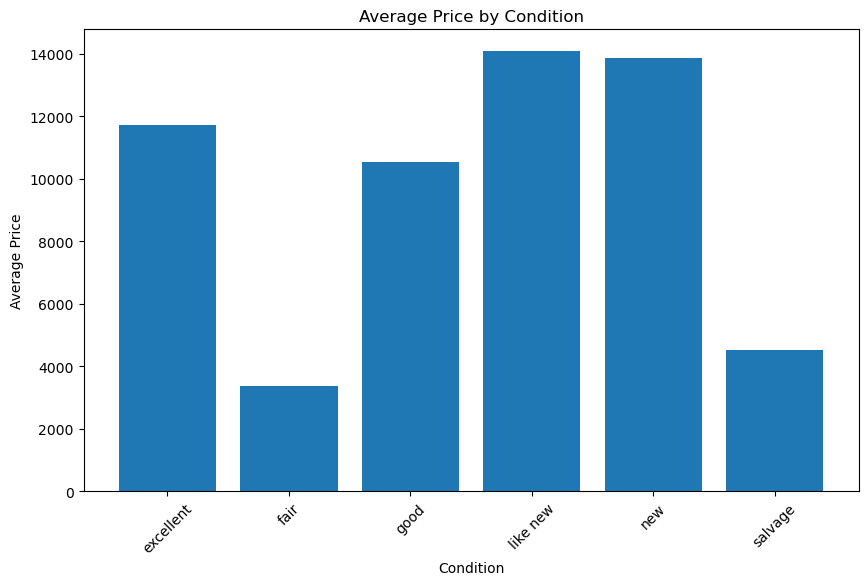

Fuel
diesel      18070.738305
electric     7033.500000
gas         10815.529326
hybrid       7495.007371
other       16753.084906
Name: Price($), dtype: float64

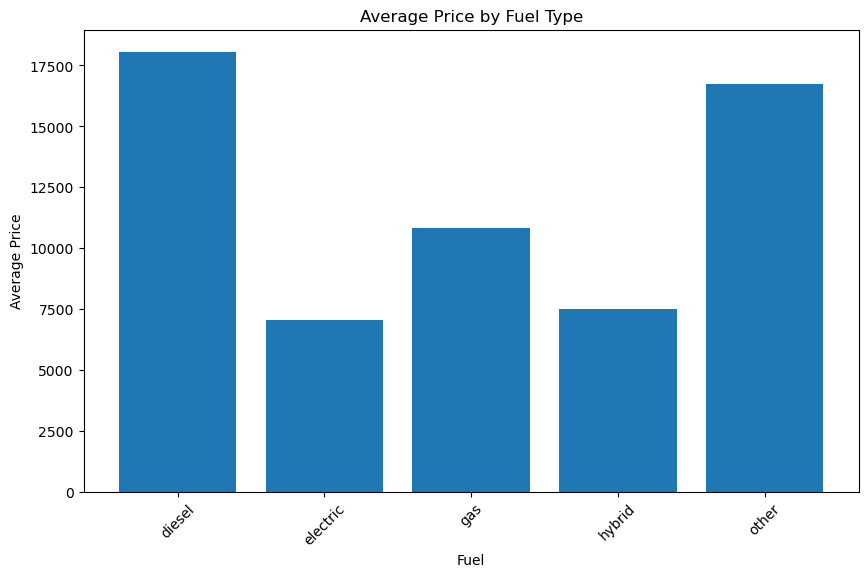

Paint
Not Available    11361.653216
black            12431.663843
blue              9731.187795
brown             9923.093287
custom            9647.152312
green             8401.722741
grey             10476.943217
orange           13762.948598
purple            6879.400000
red              10799.430215
silver           10096.335362
white            12797.810855
yellow           14859.881579
Name: Price($), dtype: float64

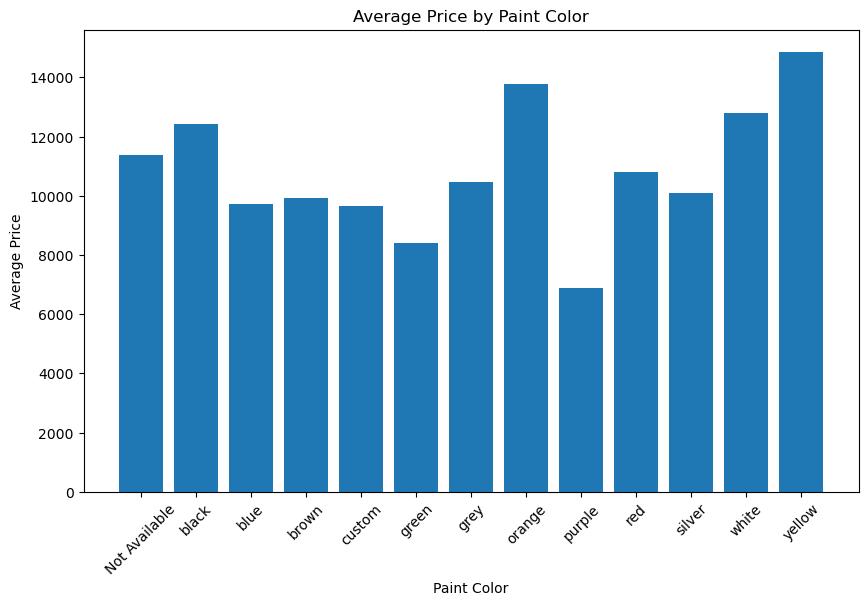

Days Listed
0      10705.387755
1      12344.242424
2      12010.717842
3      11355.027174
4      11099.488943
           ...     
256     8980.000000
261     3800.000000
263     5995.000000
267     5500.000000
271     5200.000000
Name: Price($), Length: 226, dtype: float64

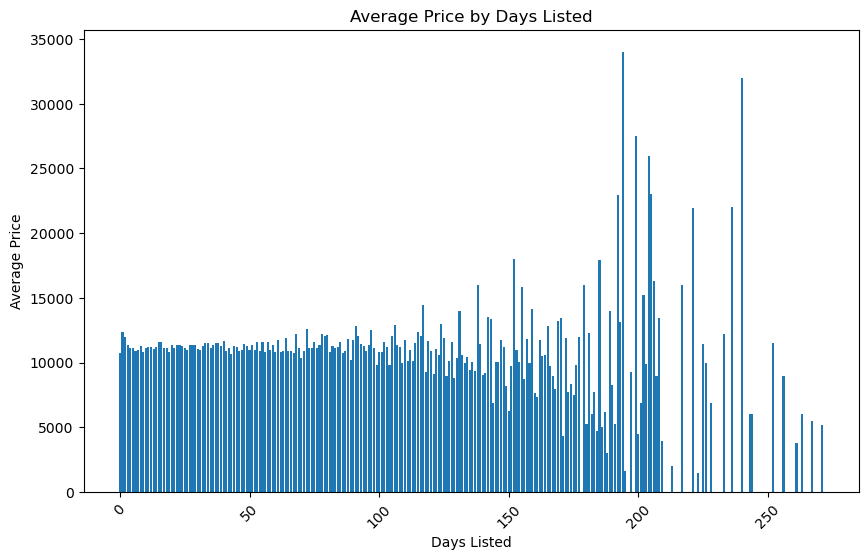

In [98]:
#Average Price By Condition
average_price_by_condition = vehicles_df.groupby('Condition')['Price($)'].mean()
display(average_price_by_condition)

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_condition.index, average_price_by_condition.values)
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Fuel
avg_price_by_fuel = vehicles_df.groupby('Fuel')['Price($)'].mean()
display(avg_price_by_fuel)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_fuel.index, avg_price_by_fuel.values)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Paint Color
avg_price_by_color = vehicles_df.groupby('Paint')['Price($)'].mean()
display(avg_price_by_color)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_color.index, avg_price_by_color.values)
plt.title('Average Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Days Listed
avg_price_by_days_listed = vehicles_df.groupby('Days Listed')['Price($)'].mean()
display(avg_price_by_days_listed)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_days_listed.index, avg_price_by_days_listed.values)
plt.title('Average Price by Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

This last graph tells some interesting information. Despite some of these vehicles remaining on the lot for over half a year, they are refusing to lower the price to try and get them sold. However, where this may not be a big deal is if they are having quick turnaround with the lower-priced, used cars. 

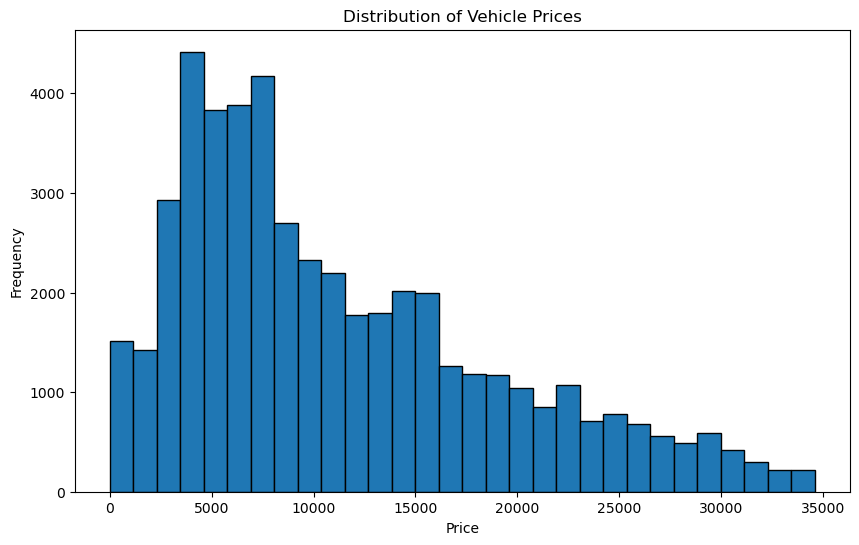

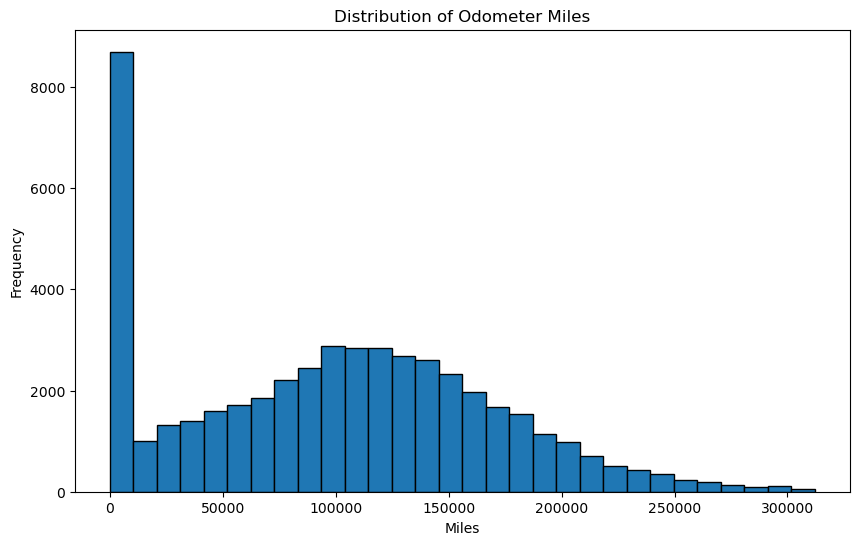

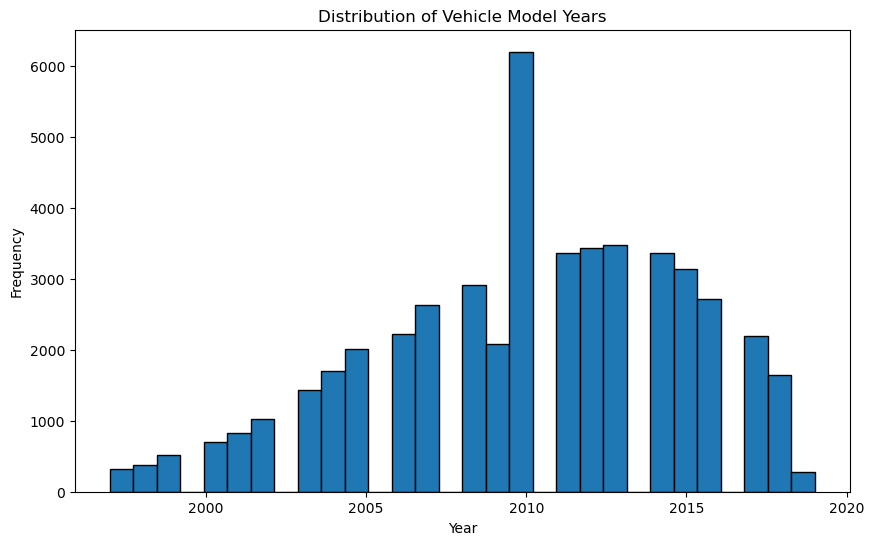

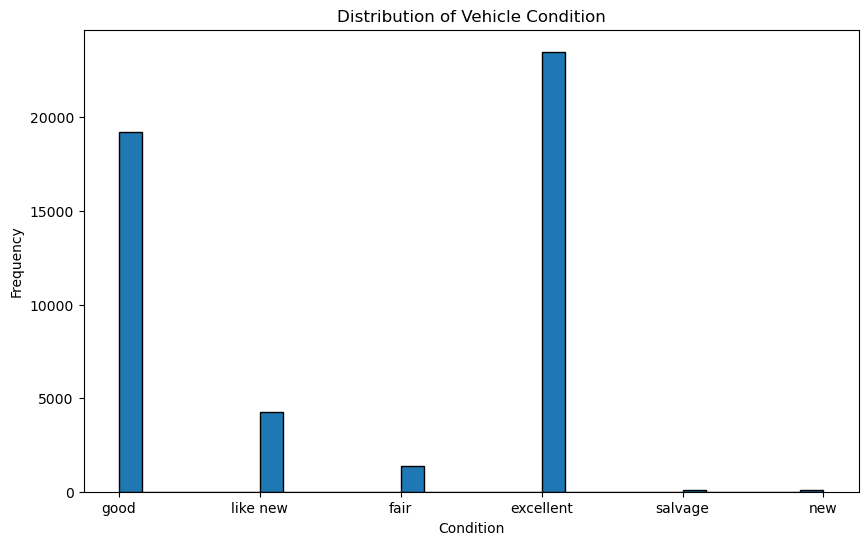

In [99]:
#Histograms
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['Price($)'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['Odometer'], bins=30, edgecolor='black')
plt.title('Distribution of Odometer Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['Year'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['Condition'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

The histograms show this dealership has majority of cars in excellent or good condtion. This may be why the average days listed is about 40. Basically, they seem to have cars in solid condition which stay, on average, a little over a month--this indicates customers believe the prices for quality are fair for the most part.

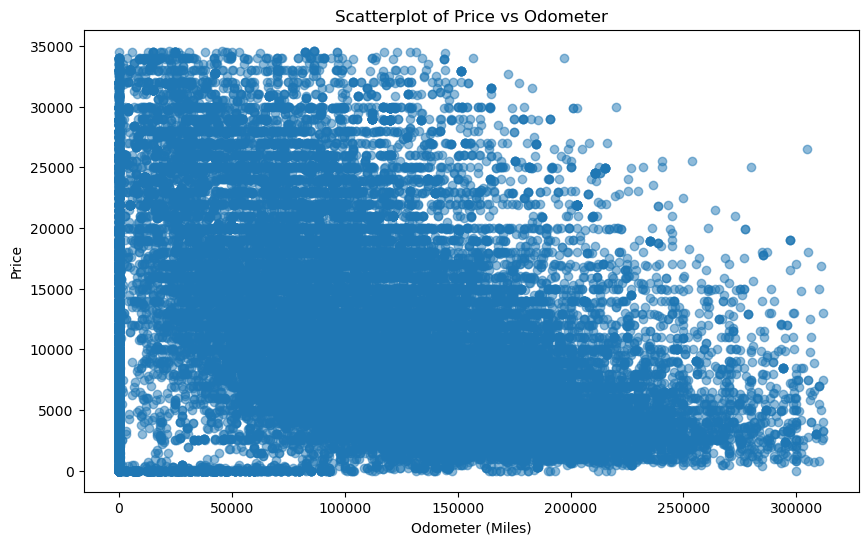

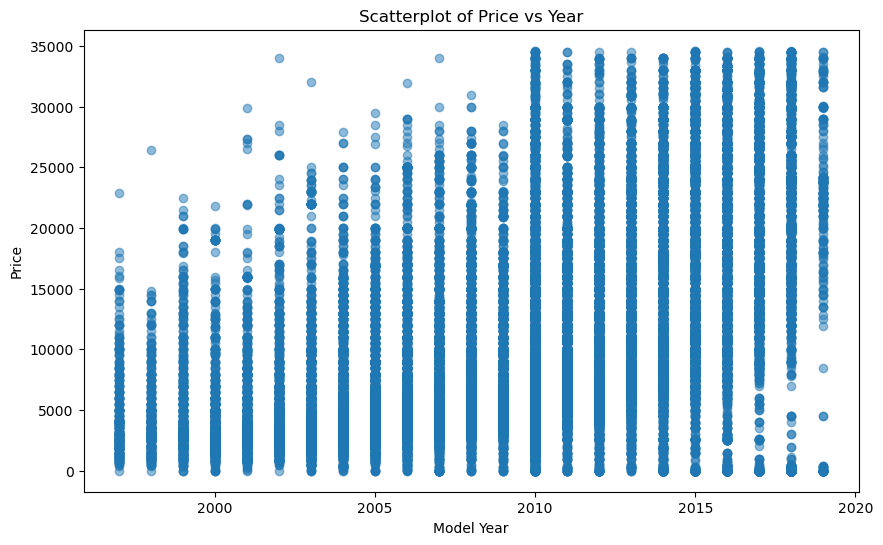

In [100]:
#Scatter Plots
#Odometer Vs Price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df['Odometer'], vehicles_df['Price($)'], alpha=0.5)
plt.title('Scatterplot of Price vs Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()

#ModelYear Vs Price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df['Year'], vehicles_df['Price($)'], alpha=0.5)
plt.title('Scatterplot of Price vs Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


The scatter plots further reiforce the conclusions already came to. This dealer has cars which are, mostly, less than 20 years old and at fairer prices.